**K-Nearest Neighbours** is one of the most basic yet essential classification algorithms in Machine Learning. It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining and intrusion detection.


Say we are given a data set of items, each having numerically valued features (like Height, Weight, Age, etc). If the count of features is n, we can represent the items as points in an n-dimensional grid. Given a new item, we can calculate the distance from the item to every other item in the set. We pick the k closest neighbors and we see where most of these neighbors are classified in. We classify the new item there.
So the problem becomes how we can calculate the distances between items. The solution to this depends on the data set. If the values are real we usually use the Euclidean distance. If the values are categorical or binary, we usually use the Hamming distance.


**Algorithm:**

Given a new item:

    1. Find distances between new item and all other items

    2. Pick k shorter distances

    3. Pick the most common class in these k distances
    
    4. That class is where we will classify the new item

**How It Works ?** 
K-Nearest Neighbors is one of the most basic yet essential classification algorithms in Machine Learning. It belongs to the **supervised learning domain** and finds **intense application in pattern recognition, data mining and intrusion detection**. The K-Nearest Neighbors (KNN) algorithm is a simple, easy-to-implement **supervised machine learning algorithm that can be used to solve both classification and regression problems.** **The KNN algorithm assumes that similar things exist in close proximity.** In other words, similar things are near to each other. **KNN captures the idea of similarity** (sometimes called distance, proximity, or closeness) with some mathematics we might have learned in our childhood— calculating the distance between points on a graph. There are other ways of calculating distance, and one way might be preferable depending on the problem we are solving. However, the straight-line distance (also called the Euclidean distance) is a popular and familiar choice. It is widely disposable in real-life scenarios **since it is non-parametric**, meaning, it does not make any underlying assumptions about the distribution of data (as opposed to other algorithms such as GMM, which assume a Gaussian distribution of the given data). 

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from sklearn.datasets import load_iris

In [5]:
dataset=load_iris()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
dataset.data.shape

(150, 4)

In [9]:
np.unique(dataset.target)

array([0, 1, 2])

In [17]:
np.unique(dataset.target_names)

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [16]:
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
df.shape # will print shpae of dataframe

(150, 4)

In [26]:
df['target']=dataset.target
df.sample()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
115,6.4,3.2,5.3,2.3,2


In [27]:
df[df.target==1].head() # will print all versicolor flower details

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [28]:
df[df.target==2].head() #will print all virginica flower details

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [29]:
df[df.target==0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [32]:
df['flower_name']=df.target.apply(lambda x: dataset.target_names[x])
df.sample(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
34,4.9,3.1,1.5,0.2,0,setosa
72,6.3,2.5,4.9,1.5,1,versicolor


**Data Visualization -Plotting graphs**

In [55]:
df0=df[:50] # all setosa flower details
df1=df[50:100] # all versicolor flower details
df2=df[100:] # all virginica flower details

**sepal length (cm) Vs sepal width (cm) -setosa & versicolor**

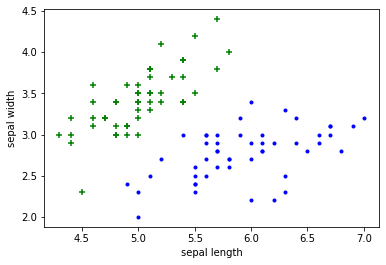

In [56]:
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker='.')

From above we get an inttution that we can apply KNN classifier

**petal length (cm) Vs petal width (cm) -setosa & versicolor**

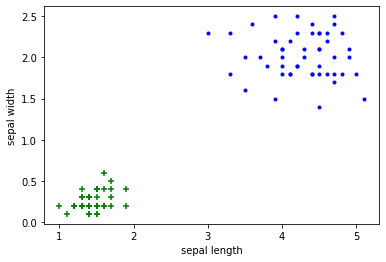

In [59]:
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green',marker='+')
plt.scatter(df1['petal length (cm)'],df2['petal width (cm)'],color='blue',marker='.')

**train_test_split**

In [61]:
X=df.drop(['target','flower_name'],axis=1)
y=df.target

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [63]:
len(X_train),len(X_test)

(120, 30)

Observation : X_train has 120 sample and X_test has 30 sample

**Creating KNN Classifier(K Nearest Neighbors classifier)**

In [72]:
 from sklearn.neighbors import KNeighborsClassifier
 knn=KNeighborsClassifier(n_neighbors=10)
 knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [73]:
knn.score(X_test,y_test)

0.9666666666666667

In [79]:
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(X_test)
confusion_matrix=confusion_matrix(y_test, y_pred)
confusion_matrix


array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

Text(33.0, 0.5, 'Truth')

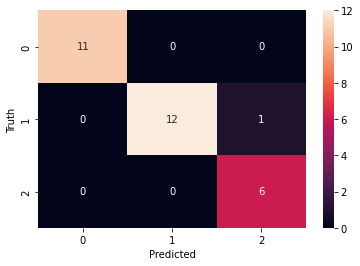

In [82]:
sns.heatmap(confusion_matrix,annot=True) # visualization of Confussion matrics
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [85]:
#df.flower_name.unique()

Observation : 11 sample we are correctly predicted as setosa, 12 sample correctly predicted as versicolor  and 6 are of  virginica and 1 sample wrongly predicted as virginica instead of 'versicolor'.

In [87]:
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



Another Dataset digits

In [156]:
from sklearn.datasets import load_digits
digits=load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [157]:
digits.data.shape

(1797, 64)

In [158]:
digits.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [159]:
np.unique(digits.target) 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<Figure size 432x288 with 0 Axes>

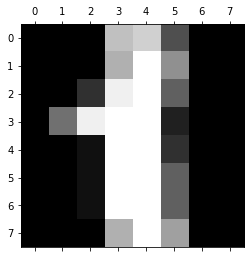

In [160]:
plt.gray()
plt.matshow(digits.data[1].reshape(8,8))

In [161]:
# creating new dataframe 
df1= pd.DataFrame(digits.data,columns=digits.feature_names)
df1

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [162]:
df1.shape

(1797, 64)

In [163]:
df1['target'] = digits.target
df1.head(2)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1


In [164]:
X=df1.drop('target',axis=1)
y=df1.target

In [165]:
from sklearn.model_selection import train_test_split

# Train & Test split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,
                                                    random_state=10)

print('Shape of Training Xs:{}'.format(x_train.shape))
print('Shape of Test Xs:{}'.format(x_test.shape))
print('Shape of Training y:{}'.format(y_train.shape))
print('Shape of Test y:{}'.format(y_test.shape))

Shape of Training Xs:(1257, 64)
Shape of Test Xs:(540, 64)
Shape of Training y:(1257,)
Shape of Test y:(540,)


In [166]:
len(x_train),len(x_test)

(1257, 540)

In [167]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [168]:
score=knn.score(x_test,y_test)
score

0.987037037037037

In [169]:
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(x_test)
confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix


array([[51,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 56,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 55,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 56,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 50,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 50,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 55,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 60,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0, 48,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 52]])

Text(42.0, 0.5, 'True')

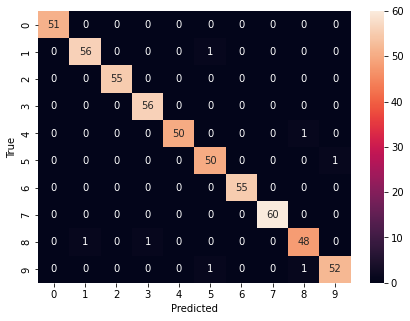

In [171]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix,annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")

#dignoal Element are correctly predicted 

In [172]:
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.98      0.98      0.98        57
           2       1.00      1.00      1.00        55
           3       0.98      1.00      0.99        56
           4       1.00      0.98      0.99        51
           5       0.96      0.98      0.97        51
           6       1.00      1.00      1.00        55
           7       1.00      1.00      1.00        60
           8       0.96      0.96      0.96        50
           9       0.98      0.96      0.97        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



In [125]:
from sklearn.model_selection import train_test_split

# Train & Test split
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,
                                                    random_state=30)

print('Shape of Training Xs:{}'.format(x_train.shape))
print('Shape of Test Xs:{}'.format(x_test.shape))
print('Shape of Training y:{}'.format(y_train.shape))
print('Shape of Test y:{}'.format(y_test.shape))

Shape of Training Xs:(1437, 64)
Shape of Test Xs:(360, 64)
Shape of Training y:(1437,)
Shape of Test y:(360,)


In [128]:
from sklearn.linear_model import LogisticRegression
le=LogisticRegression(max_iter=1000)
le.fit(x_train,y_train)
score=le.score(x_test,y_test)
score

0.9722222222222222

In [131]:
from sklearn.metrics import confusion_matrix
y_pred=le.predict(x_test)
confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix


array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 43,  0,  0,  0,  0,  0,  0,  2,  1],
       [ 0,  0, 41,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 25,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 33,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0, 36,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 29]])

Text(33.0, 0.5, 'True')

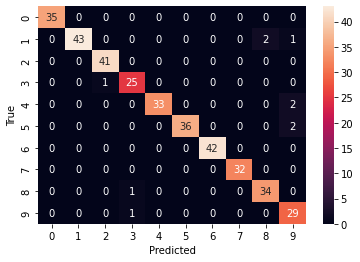

In [133]:
sns.heatmap(confusion_matrix,annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")

In [132]:
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      0.93      0.97        46
           2       0.98      1.00      0.99        41
           3       0.93      0.96      0.94        26
           4       1.00      0.94      0.97        35
           5       1.00      0.95      0.97        38
           6       1.00      1.00      1.00        42
           7       1.00      1.00      1.00        32
           8       0.94      0.97      0.96        35
           9       0.85      0.97      0.91        30

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

